# Comparison of Multivariate Linear Regression Models

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

datasetURL = "https://www.kaggle.com/budincsevity/szeged-weather#weatherHistory.csv"; # required url to download for CSV file. 

WEATHER_PATH = "datasets/weather"
def load_weather_data(weather_path=WEATHER_PATH):
    csv_path = os.path.join(weather_path, "weatherHistory.csv")
    return pd.read_csv(csv_path)

weather = load_weather_data()

In [2]:
weather.head()

,Formatted Date,Summary,Precip Type,Temperature,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.


In [3]:
weather.info()
print("\nThe info() command shows that the size of the data set is 8.8+ MB\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
Formatted Date            96453 non-null object
Summary                   96453 non-null object
Precip Type               95936 non-null object
Temperature               96453 non-null float64
Apparent Temperature      96453 non-null float64
Humidity                  96453 non-null float64
Wind Speed (km/h)         96453 non-null float64
Wind Bearing (degrees)    96453 non-null int64
Visibility (km)           96453 non-null float64
Loud Cover                96453 non-null int64
Pressure (millibars)      96453 non-null float64
Daily Summary             96453 non-null object
dtypes: float64(6), int64(2), object(4)
memory usage: 8.8+ MB

The info() command shows that the size of the data set is 8.8+ MB



In [4]:
num_of_elements = weather.shape[0]*weather.shape[1]
print("\nThe number of rows: ", weather.shape[0])
print("The number of features: ", weather.shape[1])
print("\nThe number of elements = (number of rows)*(number of columns): = ", num_of_elements)


The number of rows:  96453
The number of features:  12

The number of elements = (number of rows)*(number of columns): =  1157436


In [5]:
weather.describe()

,Temperature,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## DATA DISCOVERY, CLEANING, AND SCALING

In [6]:
# Data Discover
corr_matrix = weather.corr()
corr_matrix["Temperature"]

Temperature               1.000000
Apparent Temperature      0.992629
Humidity                 -0.632255
Wind Speed (km/h)         0.008957
Wind Bearing (degrees)    0.029988
Visibility (km)           0.392847
Loud Cover                     NaN
Pressure (millibars)     -0.005447
Name: Temperature, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 8 columns):
Summary                   96453 non-null object
Temperature               96453 non-null float64
Apparent Temperature      96453 non-null float64
Humidity                  96453 non-null float64
Wind Speed (km/h)         96453 non-null float64
Wind Bearing (degrees)    96453 non-null int64
Visibility (km)           96453 non-null float64
Pressure (millibars)      96453 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 5.9+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FD1D278>,
      dtype=object)

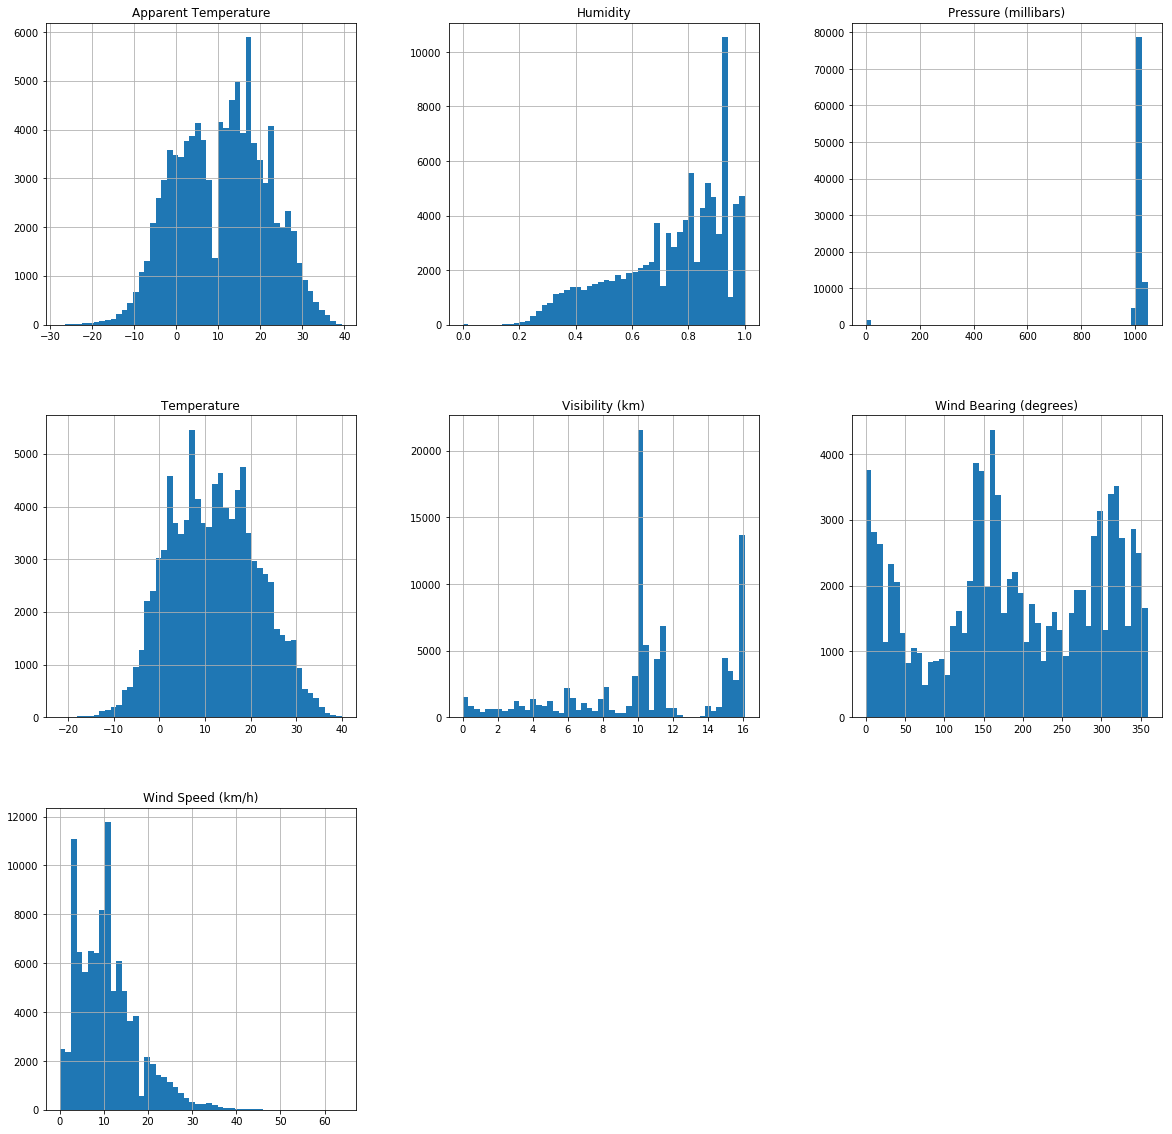

In [7]:
# Data cleaning
#weather = weather.drop(weather.columns[[0,2]], axis=1, inplace=True)
weather = weather.drop("Formatted Date", axis=1)
weather = weather.drop("Loud Cover", axis=1)
weather = weather.drop("Precip Type", axis=1)
weather = weather.drop("Daily Summary", axis=1)
#weather = weather.drop("Summary", axis=1)
weather.info()
weather.hist(bins=50, figsize=(20,20))

In [8]:
weather.head()

,Summary,Temperature,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [9]:
#%matplotlib inline
#from pandas.tools.plotting import scatter_matrix
#attributes = ["Temperature","Apparent Temperature","Humidity","Wind Speed (km/h)","Wind Bearing (degrees)","Visibility (km)","Pressure (millibars)"]
#scatter_matrix(weather[attributes], figsize=(20,12))

In [10]:
corr_matrix = weather.corr()
corr_matrix["Temperature"].sort_values(ascending=False)

Temperature               1.000000
Apparent Temperature      0.992629
Visibility (km)           0.392847
Wind Bearing (degrees)    0.029988
Wind Speed (km/h)         0.008957
Pressure (millibars)     -0.005447
Humidity                 -0.632255
Name: Temperature, dtype: float64

In [11]:
# Feature Scaling
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.base import BaseEstimator, TransformerMixin

labelEncoder = LabelEncoder()
weather['Summary']= labelEncoder.fit_transform(weather['Summary'].astype(str))
weather.head()

,Summary,Temperature,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,19,9.472222,7.388889,0.89,14.1197,251,15.8263,1015.13
1,19,9.355556,7.227778,0.86,14.2646,259,15.8263,1015.63
2,17,9.377778,9.377778,0.89,3.9284,204,14.9569,1015.94
3,19,8.288889,5.944444,0.83,14.1036,269,15.8263,1016.41
4,17,8.755556,6.977778,0.83,11.0446,259,15.8263,1016.51


In [12]:
weather_label = weather["Temperature"]
weather_features = weather.drop("Temperature", axis=1)
weather_features_numerical = weather_features.drop("Summary", axis=1)
weather_features_numerical.head()

,Apparent Temperature,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,7.388889,0.89,14.1197,251,15.8263,1015.13
1,7.227778,0.86,14.2646,259,15.8263,1015.63
2,9.377778,0.89,3.9284,204,14.9569,1015.94
3,5.944444,0.83,14.1036,269,15.8263,1016.41
4,6.977778,0.83,11.0446,259,15.8263,1016.51


In [13]:
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_attributes = list(weather_features_numerical)
cat_attributes = ["Summary"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attributes)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attributes)),
        ('cat_encoder', OneHotEncoder(sparse=False)),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

weather_features = full_pipeline.fit_transform(weather_features)
#data_set_without_price.shape[1]

#taking test train dataset
X_train,X_test,y_train,y_test = train_test_split(weather_features,weather_label,test_size=0.2,random_state=42)

## IMPLEMENTATION OF GRADIENT DESCENT

In [14]:
class MyLinearRegression:
    opt_learning_val = [[] for i in range(3)]
    all_learning_vals = [0.001, 0.01, 0.1]
    count = -1
    def __int__ (self):
        self.theta = 0; # parameter vector;
        self.alpha = 0; # learning rate
        self.cost  = 0; # cost function
        self.gradient_cost = 0
        self.y_predict = 0
        self.X_b = 0
        self.X_new = 0
       
        
    def fitUsingGradientDescent(self, X_train, y_train):
        # implementation code here
        self.theta = 0
        self.X_b = np.c_[np.ones((len(X_train), 1)), X_train]
        for i in range(len(self.all_learning_vals)):
            self.theta= np.random.random(X_train.shape[1]+1)
            self.count =  self.count+1
            self.gradientDescent(X_train, y_train,self.theta,self.all_learning_vals[i],1000)
    
    def add_iteration(self,value1,value2):
        self.opt_learning_val[value1].append(value2)
        
    def gradientDescent(self, X_train, y_train, theta, alpha, iters):
        for iteration in range(iters):
            self.add_iteration(self.count,self.computeCostFunc( X_train, y_train, self.theta))
            self.theta = self.theta - alpha * self.gradient_cost
           
    def computeCostFunc(self, X_train, y_train, theta): 
        self.gradient_cost =  2/len(X_train)* self.X_b.T.dot(self.X_b.dot(theta) - y_train)
        temp =  np.dot(self.X_b, theta) - y_train
        return np.sum(np.power(temp, 2)) / len(X_train)
        
    def predict(self, X_test):
        self.X_new = 0
        self.y_predict = 0
        self.X_new = np.c_[np.ones((len(X_test), 1)), X_test]
        self.y_predict = self.X_new.dot(self.theta)
        return self.y_predict
     
    def fitUsingNormalEquation(self, X_train, y_train):
        self.X_b = np.c_[np.ones((len(X_train), 1)), X_train]
        self.theta = np.linalg.pinv(self.X_b.T.dot(self.X_b)).dot(self.X_b.T).dot(y_train)

myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)
y_predict_myGradient = myGradientDescentModel.predict(X_test)
print("Prediction values predicte by my gradient descent:",y_predict_myGradient)   

Prediction values predicte by my gradient descent: [28.03321285  9.61190675 15.14199688 ... 12.06328937 24.92118493
 19.53027078]


Text(0.5,1,'Error vs. Training Iterations')

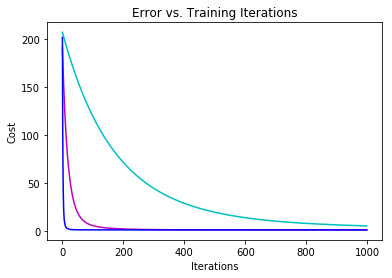

In [15]:
color = ['c','m','b']
for i in range (len(myGradientDescentModel.all_learning_vals)):
    y = myGradientDescentModel.opt_learning_val[i]
    x = [i for i in range(len(y))]
    plt.plot(x,y,color[i])
    
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  

## IMPLEMENTATION OF THE NORMAL EQUATION
$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

In [16]:
myNormalEquationModel = MyLinearRegression()
myNormalEquationModel.fitUsingNormalEquation(X_train, y_train)
y_predict_normalEquation = myNormalEquationModel.predict(X_test)
print("Predictions using Normal Equation:",y_predict_normalEquation)

Predictions using Normal Equation: [28.01863978  9.59436683 15.13574617 ... 12.06135252 24.89294655
 19.50358912]


## COMPARISON OF DIFFERENT IMPLEMENTATIONS

In [17]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_predict_linearRegression = linear_regression.predict(X_test)
print("Predictions predicted by Linear Regression:", y_predict_linearRegression)

Predictions predicted by Linear Regression: [28.02148438  9.5871582  15.13330078 ... 12.06616211 24.89501953
 19.50024414]


In [18]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)

mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print('SGD rmse: '+str(mySGDModel_rmse))

mse = mean_squared_error(y_test, y_predict_myGradient)
myGradientDescentModel_rmse = np.sqrt(mse)
print('Gradient_descent rmse: '+str(myGradientDescentModel_rmse))

mse = mean_squared_error(y_test, y_predict_normalEquation)
myNormalEquationModel_rmse = np.sqrt(mse)
print('normal_equation_rmse: '+str(myNormalEquationModel_rmse))


SGD rmse: 0.9473602875592684
Gradient_descent rmse: 0.9468098336154136
normal_equation_rmse: 0.9404960982070465


C:\Users\BAHMED\Miniconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
